# Peaks

In [16]:
import sys
sys.path.append('D:/source/repos')
from utilities.std_imports import *
import scipy.signal as ss
from scipy.misc import electrocardiogram

In [35]:
ts = electrocardiogram()[2000:4000]
idxs, _ = ss.find_peaks(ts, height=0)
idxs

array([  65,  251,  325,  331,  336,  386,  431,  464,  471,  475,  481,
        489,  494,  496,  500,  507,  512,  520,  524,  529,  535,  541,
        554,  560,  566,  571,  578,  584,  590,  595,  608,  620,  625,
        631,  637,  643,  651,  656,  661,  668,  675,  686,  692,  703,
        709,  717,  722,  729,  731,  733,  738,  747,  758,  763,  779,
        788,  793,  799,  808,  811,  813,  818,  825,  836,  849,  856,
        860,  863,  867,  871,  882,  888,  895,  908,  914,  927,  938,
        956,  967,  973,  980,  987,  992,  998, 1005, 1009, 1016, 1022,
       1029, 1034, 1040, 1044, 1051, 1064, 1070, 1077, 1082, 1094, 1099,
       1105, 1111, 1125, 1136, 1144, 1147, 1154, 1161, 1167, 1171, 1179,
       1186, 1188, 1190, 1201, 1206, 1210, 1220, 1236, 1244, 1249, 1255,
       1267, 1273, 1278, 1292, 1347, 1353, 1357, 1370, 1377, 1388, 1406,
       1412, 1417, 1456, 1614, 1776, 1948], dtype=int64)

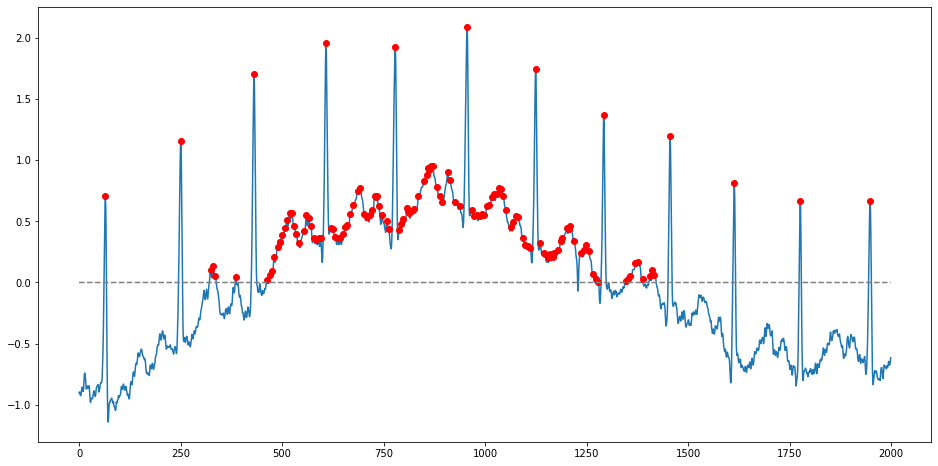

In [36]:
plt.figure(figsize=[16,8])
plt.plot(ts)
plt.plot(idxs, ts[idxs], "o", color='red')
plt.plot(np.zeros_like(ts), "--", color="gray");

### Distance constraint

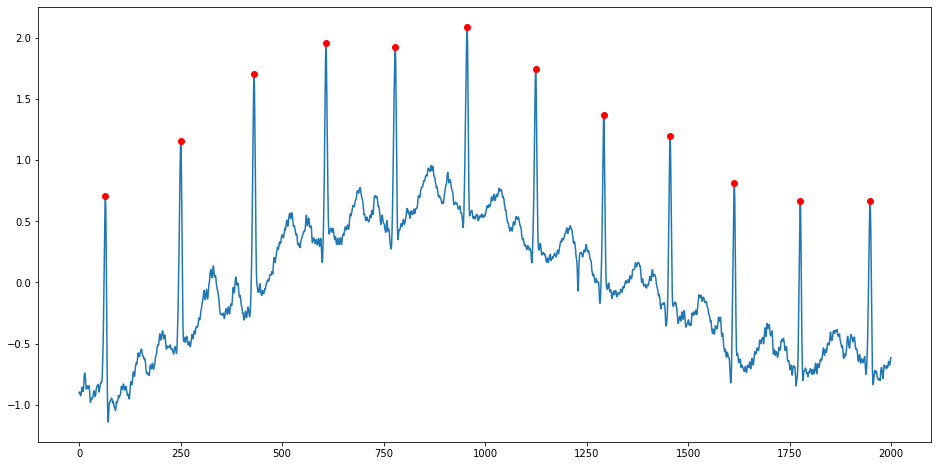

In [38]:
idxs, _ = ss.find_peaks(ts, distance=150)
#np.diff(idxs)

plt.figure(figsize=[16,8])
plt.plot(ts)
plt.plot(idxs, ts[idxs], "o", color='red')

### Limit prominence

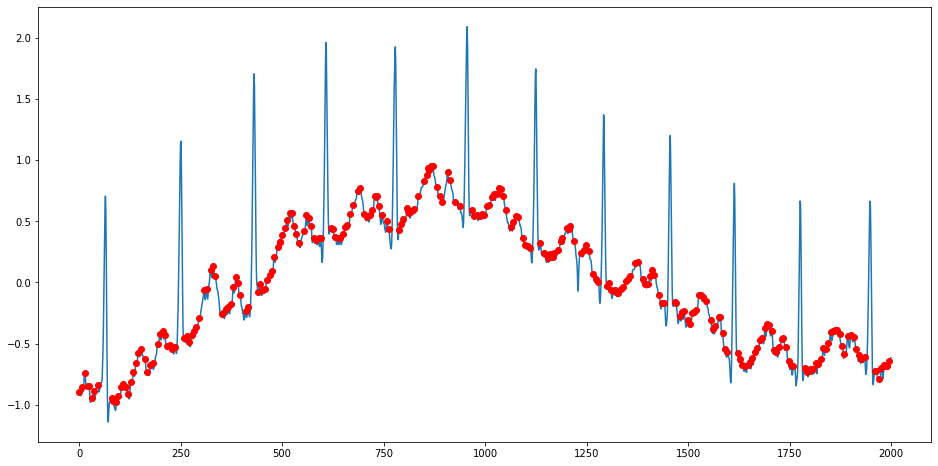

In [40]:
idxs, properties = ss.find_peaks(ts, prominence=(None, 0.6))

plt.figure(figsize=[16,8])
plt.plot(ts)
plt.plot(idxs, ts[idxs], "o", color='red')

### Restriction on peaks shape

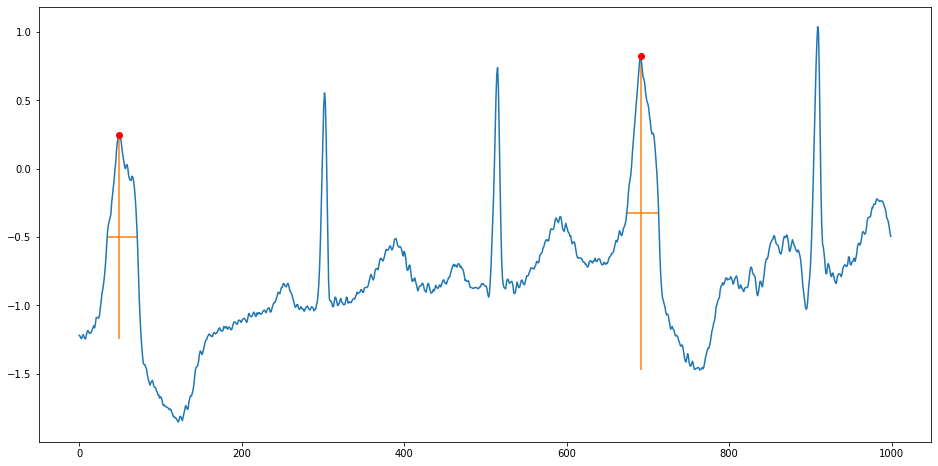

In [44]:
ts = electrocardiogram()[17000:18000]
idxs, properties = ss.find_peaks(ts, prominence=1, width=20)

plt.figure(figsize=[16,8])
plt.plot(ts)
plt.plot(idxs, ts[idxs], "o", color='red')
plt.vlines(x=idxs, ymin=ts[idxs] - properties["prominences"], ymax = ts[idxs], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"], xmax=properties["right_ips"], color = "C1")
plt.show()

### Peaks width

In [53]:
x = np.linspace(0, 6 * np.pi, 1000)
ts = np.sin(x) + 0.6 * np.sin(2.6 * x)

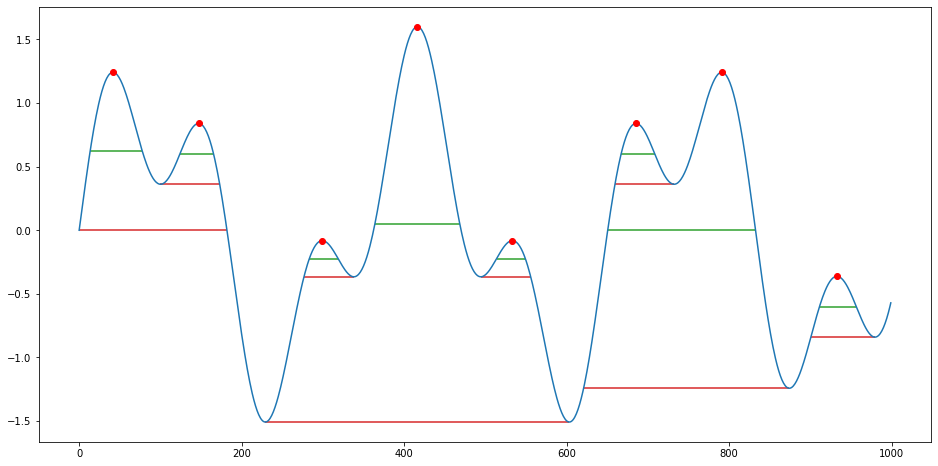

In [55]:
idxs, _ = ss.find_peaks(ts)
res_half = ss.peak_widths(ts, idxs, rel_height=0.5)
res_full = ss.peak_widths(ts, idxs, rel_height=1)

plt.figure(figsize=[16,8])
plt.plot(ts)
plt.plot(idxs, ts[idxs], "o", color='red')
plt.hlines(*res_half[1:], color="C2")
plt.hlines(*res_full[1:], color="C3")
plt.show()

### Find peaks using wavelets

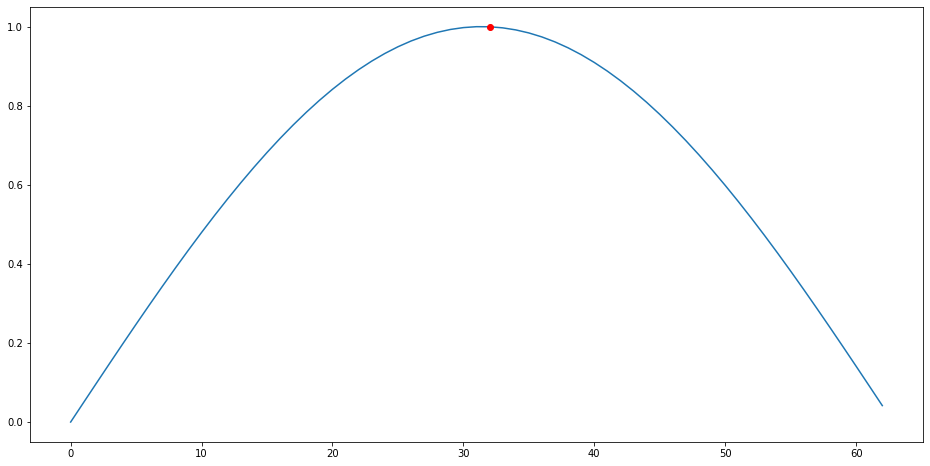

In [49]:
xs = np.arange(0, np.pi, 0.05)
ts = np.sin(xs)
idxs = ss.find_peaks_cwt(ts, np.arange(1,10))
idxs, xs[idxs], ts[idxs]
plt.figure(figsize=[16,8])
plt.plot(ts)
plt.plot(idxs, ts[idxs], "o", color='red');

### Credits & Links

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html#scipy.signal.find_peaks